# $$Regressão~Linear~Simples$$

### $$Conceito:$$
    
**Modelos Supervisionados**, que fazem inferencia ou predição para outras observações não presentes na amostra


A **Regressão Linear Simples** é modelo mais simples de regressão linear. Nela, utilizamos apenas uma variável de desfecho e uma variável preditora. Quando utilizamos mais variáveis preditoras, chamamos de Regressão Linear Múltipla.


### $$Para~ que~ serve~ a ~Regressão~ Linear~ Simples?$$


Utilizamos a regressão linear simples para descrever a relação linear entre duas variáveis. Com isso, ela é útil para:

- Quando queremos prever o valor de uma variável pelo valor da outra


- Para entender se uma variável está relacionada com a outra


- Criar um modelo base antes de criar modelos de Regressão Linear Múltipla





### $$Criterios:$$

**Modelo dos minimos quadrados(OLS)** = Somatoria dos erros² (Elimina os negativos) seja a minima possivel, quanto mais proxima de 0, melhor o modelo


Reta de regressão precisa ter a somatoria dos erros (Positivo e Negativo) = 0


Variáveis somente Quantitativas


Distribuição Normal dos dados



### $$Coeficientes:$$

**Intercepto (𝛼)** = Constante do modelo 


**Beta (𝛽)** = Coeficiente angular do modelo


**u**= Termo de erro



__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$   


## $$Criar ~um ~modelo~ de~ regressão~ linear~ simples$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
# Pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import statsmodels.api as sm

# Banco de dados 

In [47]:
#Base de dados
dados = pd.read_csv('tempdist.csv',encoding='latin-1',sep=';')
dados

,Tempo (Y),Distância (X)
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25
5,25,11
6,10,5
7,55,32
8,35,28
9,30,20


In [48]:
#Shape dos dados
dados.shape

(10, 2)

**Tabela com 10 observações e 2 variáveis**

# Analise Exploratória

In [3]:
#Info da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Tempo (Y)      10 non-null     int64
 1   Distância (X)  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


**Somente variáveis quantitativas**

In [4]:
#Descrição dos dados
dados.describe()

,Tempo (Y),Distância (X)
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


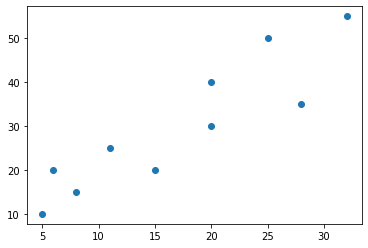

In [5]:
# GRÁFICO DE DISPERSÃO
plt.scatter(x=dados['Distância (X)'] ,y =dados['Tempo (Y)']);

**Note que parece haver uma correlação positiva entre a variável explicativa e a variável target, vamos confirmar a analise fazendo uma regressão linar simples**

# Modelagem - Regressão linear simples

In [6]:
#Separar as variáveis X e Y

x=dados['Distância (X)'] 
y =dados['Tempo (Y)']

In [7]:
#Criar o modelo
modelo_coeangular = sm.OLS(y,x) #Somente o Coeficiente angular
x_interc = sm.add_constant(x) # Somente o Intercept
modelo = sm.OLS(y,x_interc) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
resultado = modelo.fit() # Treinar o modelo
resultado.summary() # Verificar os dados do modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Tempo (Y)   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           0.000314
Time:                        09:29:20   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.8784      4.532      1.297      0.231      -4.573      16.330
Distância (X)     1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Definição dos coeficientes:

**R-squared(R²)** = Indica em forma de porcentagem o quanto da variável Dependente(y) é explicada através da variável Explicativas(X)

**F-statistic:** = Permite analisar se pelo menos um dos betas é estatisticamente significante para a explicação do comportamento de Y

**Df Residuals:** = São os graus de liberdade, o cálculo se dá através do número de observações do dataframe menos o número de parâmetros do algoritmo, o número também representa o máximo de variáveis explicativas eu posso ter em meu modelo**

**Teste t:** = Verifica de forma individual se a variável é estatisticamente significante para a explicação do comportamento de Y

## Calculo do R²:

**Formula:**
    
R² = SQM/(SQM+SQE)

In [8]:
#Media dos dados da variavel target 
media_dados = np.mean(y)
media_dados

30.0

In [9]:
# Previsao do modelo
fitted = resultado.fittedvalues
dados['fitted'] = fitted
fitted

0    17.229730
1    14.391892
2    27.162162
3    34.256757
4    41.351351
5    21.486486
6    12.972973
7    51.283784
8    45.608108
9    34.256757
dtype: float64

In [10]:
#Erro do modelo
dados['Erro'] = resultado.resid
print(resultado.resid)
print(f'\nSoma dos Erros: {round(sum(resultado.resid),2)}')

0    -2.229730
1     5.608108
2    -7.162162
3     5.743243
4     8.648649
5     3.513514
6    -2.972973
7     3.716216
8   -10.608108
9    -4.256757
dtype: float64

Soma dos Erros: -0.0


**Diferença entre o valor previsto e o valor real, soma dos valores precisa ser 0**

In [11]:
#Soma dos erro do modelo²(SQE)
dados['SQE'] = resultado.resid**2
SQE = sum(resultado.resid**2)
SQE

361.1486486486486

**Soma dos erros do modelo ao quadrado para eliminar os valores negativos**

In [12]:
# (Modelo previsto - modelo medio)² 
SQM = (media_dados - fitted)**2
dados['SQM'] = SQM
SQM = sum(SQM)

#Ou

resultado.mse_model

1638.8513513513512

**Diferença entre a media dos dados menos a previsão do modelo ao quadrado**

In [13]:
#R²
r2 = SQM/(SQM+SQE)
r2

0.8194256756756758

**Note que as variáveis X explicam 81% da variável Y, portanto 19% restante são explicadas por variáveis não presentes na amostra**

## Calculo do F de Fisher-Snedecor

In [49]:
#Calculo do F de Fisher-Snedecor
K = len(resultado.cov_params()) #Numero de parametros do modelo
n = len(dados) #Numero de observações da base de dados

F = (SQM/(K-1))/(SQE/(n-K))

#P_Valor do calculo do F de Fisher-Snedecor
resultado.f_pvalue


0.00031444880290832364

**Como o P_valor do cálculo da estatística F é menor que 0.05, concluímos que pelo menos 1 coeficiente Beta é estatisticamente significante, diferente de 0, portanto há modelo**

## Teste t

In [16]:
# Nivel de significancia 
resultado.pvalues

const            0.230788
Distância (X)    0.000314
dtype: float64

**Sabemos que a variável Distancia é estatisticamente significante, e podemos verificar que o intercepto não, porém nunca devemos elimina-lo independente do seu nivel de significancia**  

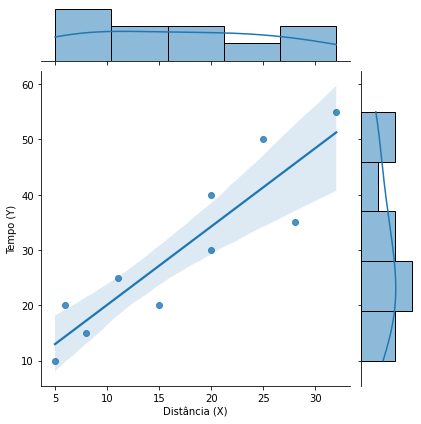

In [17]:
# GRÁFICO DE DISPERSÃO
ax=sns.jointplot(x=dados['Distância (X)'] ,y =dados['Tempo (Y)'],kind='reg' )

**Analisando o gráfico de dispersão com a reta da regressão linear, percebemos que realmente a variável X explica o comportamento da variável Y**

In [44]:
#Banco de dados Completo 

#Soma das colunas
a =round(dados.sum(axis=0),2).to_frame().T
a.index = ['soma']

#Concatenar a soma das colunas com os dados 
pd.concat([dados,a])

,Tempo (Y),Distância (X),fitted,Erro,SQE,SQM
0,15.0,8.0,17.229730,-2.229730,4.971695,163.079803
1,20.0,6.0,14.391892,5.608108,31.450877,243.613039
2,20.0,15.0,27.162162,-7.162162,51.296567,8.053324
3,40.0,20.0,34.256757,5.743243,32.984843,18.119978
4,50.0,25.0,41.351351,8.648649,74.799123,128.853178
5,25.0,11.0,21.486486,3.513514,12.344777,72.479912
6,10.0,5.0,12.972973,-2.972973,8.838568,289.919649
7,55.0,32.0,51.283784,3.716216,13.810263,452.999452
8,35.0,28.0,45.608108,-10.608108,112.531958,243.613039
9,30.0,20.0,34.256757,-4.256757,18.119978,18.119978


# Conclusão

**Objetivo do script foi criar uma regressão linear para conseguir interpretar com maior facilidade os resultados de um regressão, sabendo como interpretar os coeficientes, as medida de ajuste e como a variável preditora impacta a variável de resultado**